In [0]:
from tqdm import tqdm
import torch
import torch.nn as nn
from torch.nn import functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## PyTorch includes Fashion MNIST dataset
we are downloading to the './data' directory training set which consists of 60 thousands 28x28 pixel images with labels.
https://github.com/zalandoresearch/fashion-mnist

In [2]:
train_dataset = dsets.FashionMNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


In [3]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

### Labels
Each example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's plot first 20 samples from training set

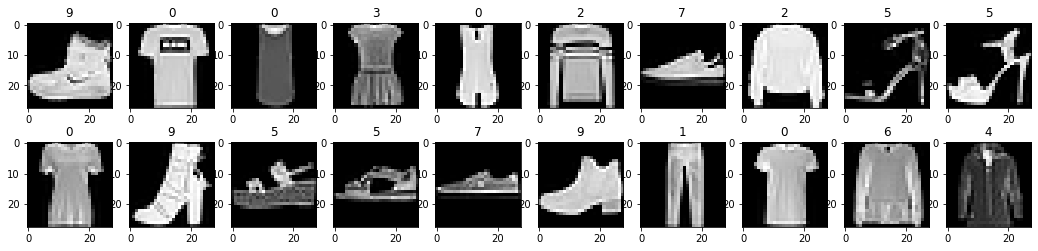

In [4]:
show_img = train_dataset[5][0].numpy().reshape(28, 28)
fig = plt.figure(figsize=(18, 4))
for i in range(20):
    tensor, label = train_dataset[i]
    axs = fig.add_subplot(2, 10, i + 1)
    axs.set_title(label)
    plt.imshow(tensor.numpy().reshape(28, 28), cmap='gray')

### Training parameters
Define some parameters of our training

In [0]:
batch_size = 10
num_epochs = 100
target_label = 1

In [0]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [7]:
for i in train_loader:
  print(i[0].shape, i[1].shape)
  break

torch.Size([10, 1, 28, 28]) torch.Size([10])


### Model

In [0]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.input_dim = input_dim
        self.weight = nn.Parameter(torch.Tensor(1, input_dim))
        self.bias = nn.Parameter(torch.Tensor(1))
    def forward(self, x):
        return torch.sigmoid(x.matmul(self.weight.t()) + self.bias)

input_dim = 28*28 
model = LogisticRegressionModel(input_dim)

In [9]:
for p in model.parameters():
  print(p.shape)

torch.Size([1, 784])
torch.Size([1])


**bold text**### Cost function
Binary cross-entropy loss

### Optimizer
Stochastic gradient descent

In [0]:
criterion = nn.BCELoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Start training

In [11]:
iter = 0
for epoch in tqdm(range(num_epochs)): 
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28)
        binary_labels = torch.tensor([int(label == target_label) for label in labels], dtype=torch.float).view(batch_size, 1)
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        loss = criterion(outputs, binary_labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1

100%|██████████| 100/100 [19:00<00:00, 11.36s/it]


In [0]:
params = [p for p in model.parameters()]
heatmap = params[0].view(28,28).detach().numpy()

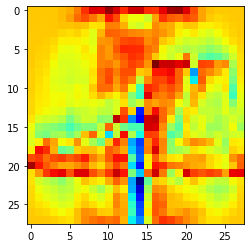

In [13]:
plt.imshow(heatmap, cmap='jet')

In [0]:
test_dataset = dsets.FashionMNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

In [15]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [0]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset)

In [0]:
test_examples = [example for example in test_loader]

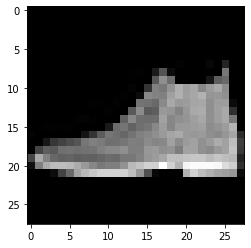

In [18]:
plt.imshow(test_examples[0][0].view(28,28), cmap='gray')

In [0]:
output = model(test_examples[0][0].view(1, 784))

In [20]:
output

tensor([[0.0043]], grad_fn=<SigmoidBackward>)

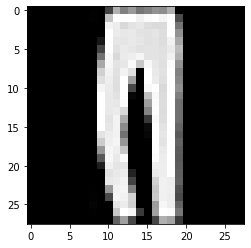

In [21]:
plt.imshow(test_examples[2][0].view(28,28), cmap='gray')

In [0]:
output = model(test_examples[2][0].view(1, 784))

In [23]:
output

tensor([[1.0000]], grad_fn=<SigmoidBackward>)

In [24]:
correct = 0
total = 0
# Iterate through test dataset
for images, labels in test_loader:
    # Load images to a Torch Variable
    images = images.view(-1, 28*28)
    binary_labels = torch.tensor([int(label == target_label) for label in labels], dtype=torch.float).view(1, 1)

    # Forward pass only to get logits/output
    outputs = model(images)
    
    # Get prediction
    predicted = float(outputs.data > 0.5)
    
    # Total number of labels
    total += labels.size(0)
    # Total correct predictions
    correct += (predicted == binary_labels).sum()
    
accuracy = 100 * correct / total

# Print Accuracy
print("Accuracy: {}".format(accuracy))

Accuracy: 99
